In [12]:
'''Build the Image classification model by dividing the model into following 4 stages:
 a. Loading and preprocessing the image data
 b. Defining the model’s architecture
 c. Training the model
 d. Estimating the model’s performance'''


'Build the Image classification model by dividing the model into following 4 stages:\n a. Loading and preprocessing the image data\n b. Defining the model’s architecture\n c. Training the model\n d. Estimating the model’s performance'

In [13]:
!pip install -U scikit-learn



In [14]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [16]:
X_train = X_train/255
X_test = X_test/255


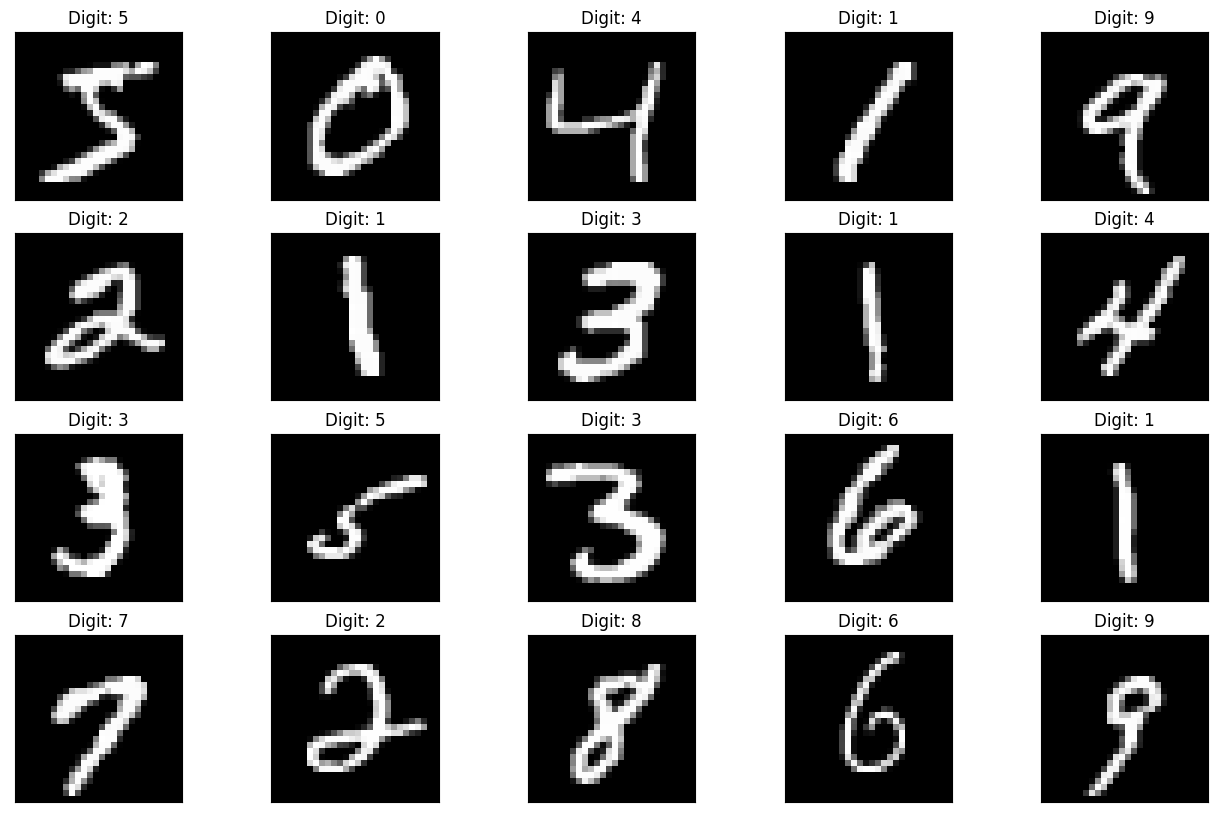

In [17]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)   
plt.show()

In [18]:
#creating neural network
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

In [19]:
#compiling
model.compile(
    optimizer='sgd', 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)

In [20]:
#training model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 39s 20ms/step - loss: 0.4766 - accuracy: 0.8690
Epoch 2/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2222 - accuracy: 0.9334
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1705 - accuracy: 0.9492
Epoch 4/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1398 - accuracy: 0.9585
Epoch 5/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1188 - accuracy: 0.9641


In [ ]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)
plt.show()

1/1 [==============================] - 0s 37ms/step


In [ ]:

predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

In [ ]:
n=random.randint(0,9999)
plt.imshow(X_test[n])
plt.show()

In [ ]:
predicted_value=model.predict(X_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1])